In [1]:
from lvmtipo.actors import lvm
from cluplus.proxy import invoke

from lvmagp.images import Image
from plotimg import plot_images

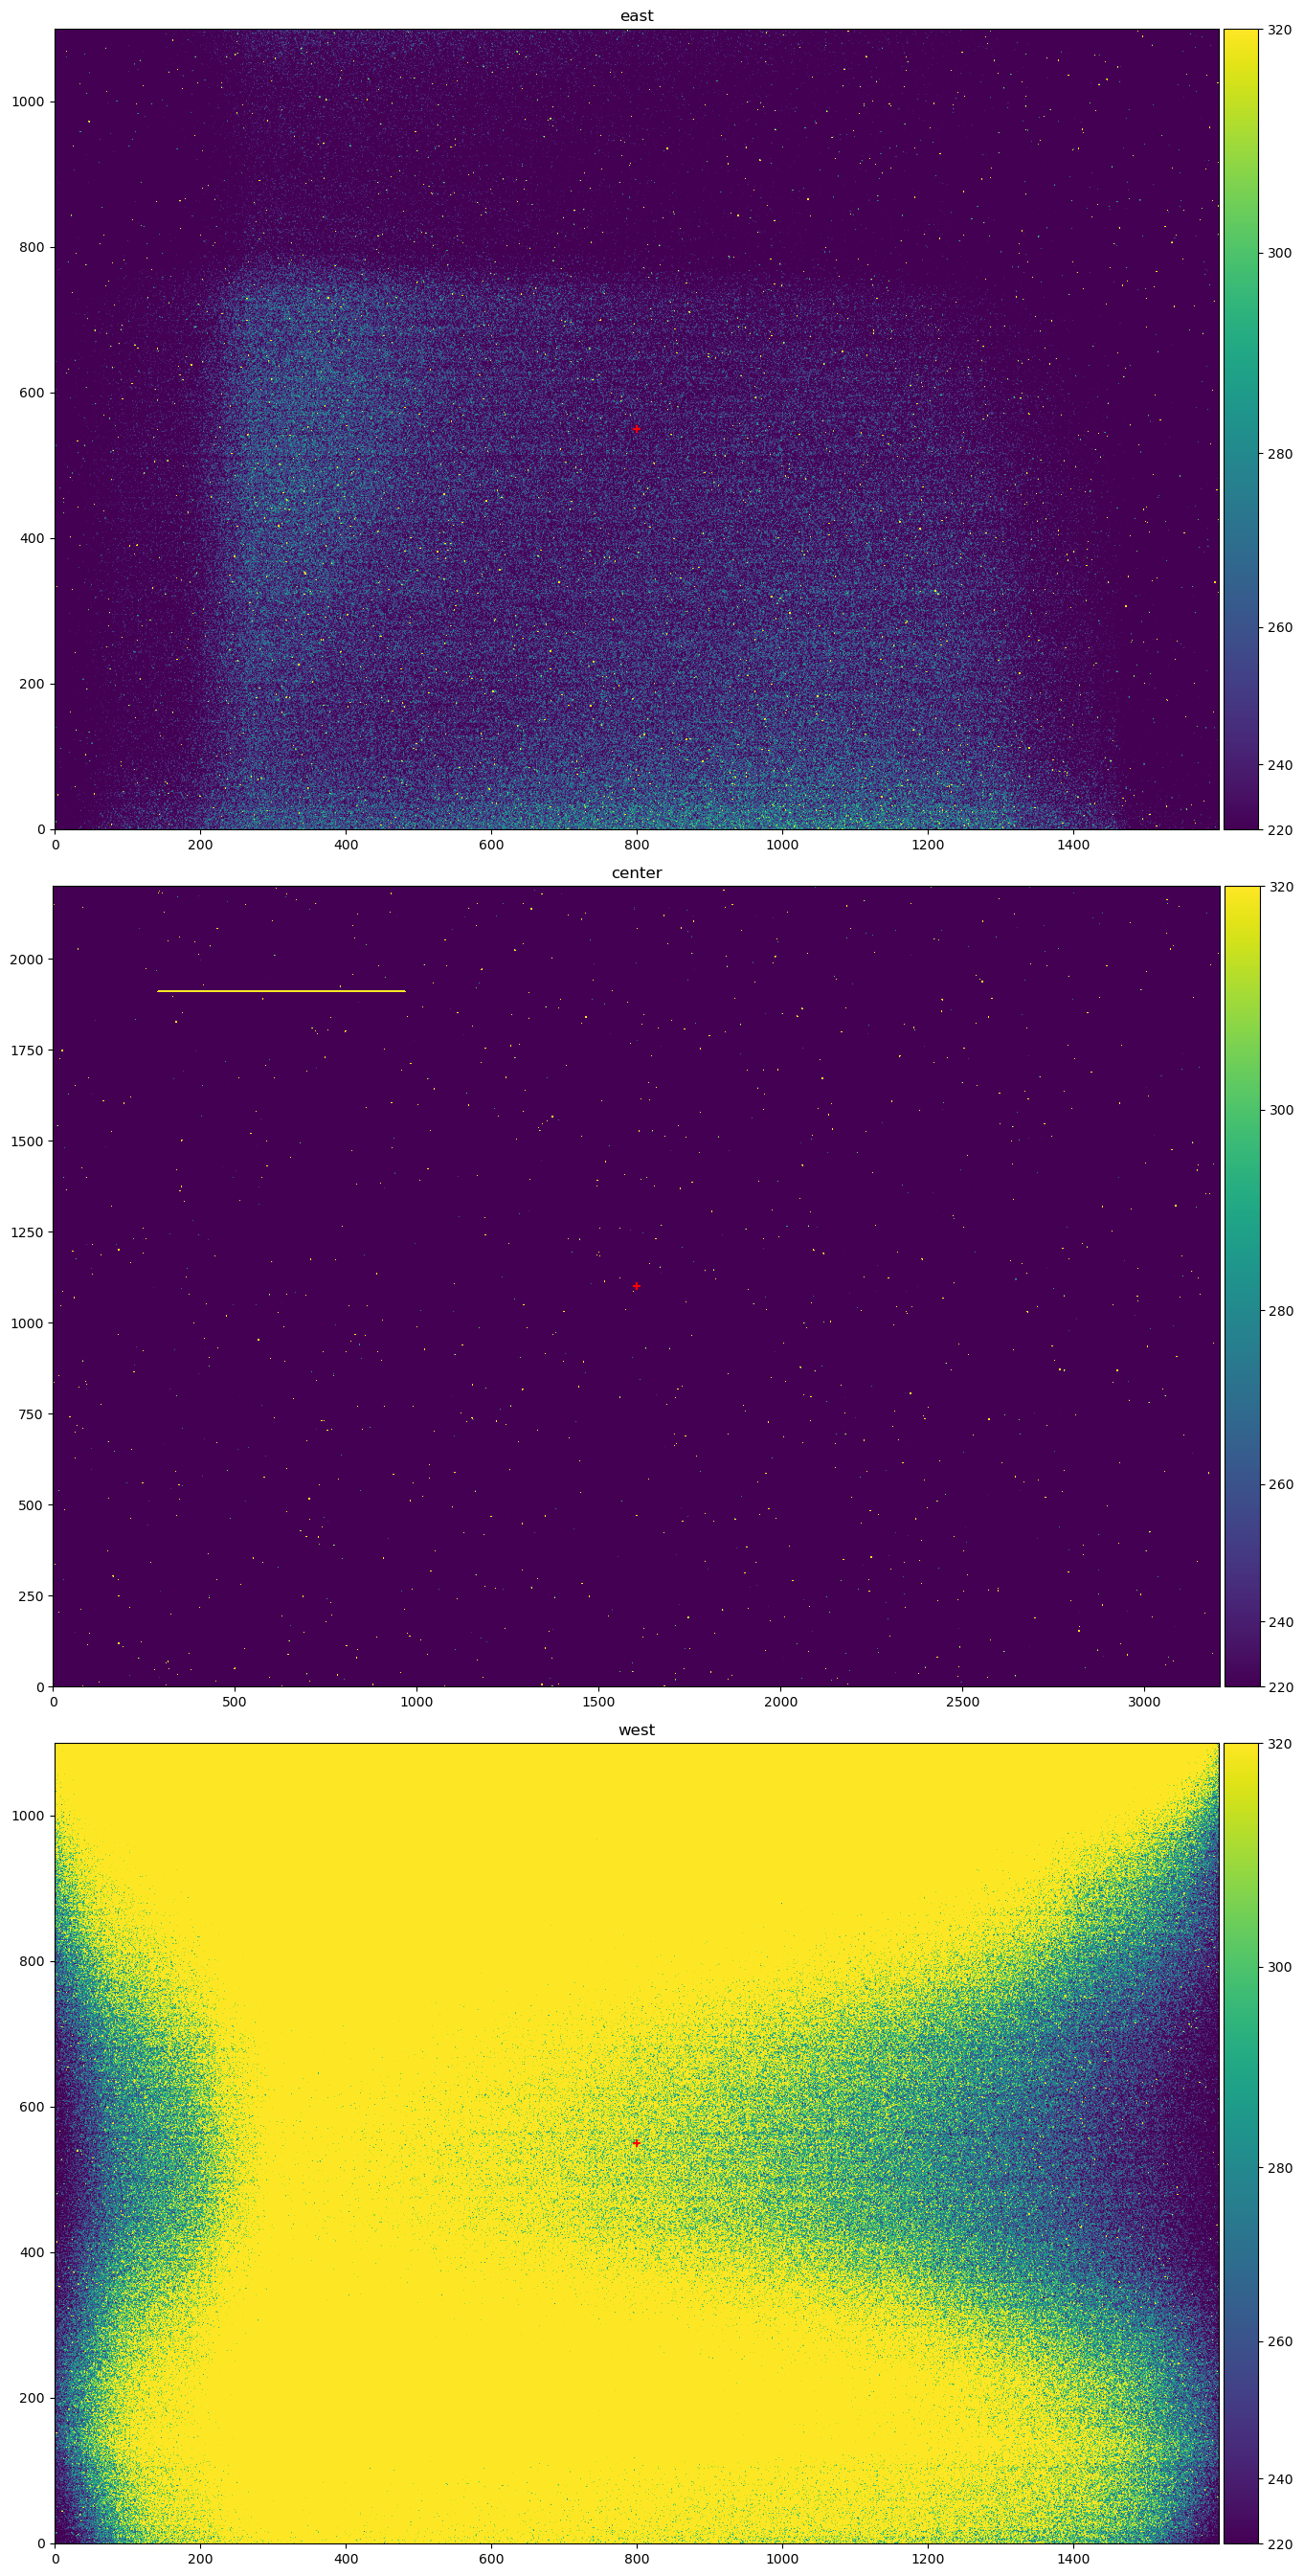

CancelledError: 

In [5]:
%matplotlib inline 

import asyncio

from cluplus.proxy import invoke

from lvmtipo.actors import lvm
from lvmagp.images import Image
from plotimg import plot_images

from IPython.display import clear_output

await lvm.sci.foc.start()
await lvm.sci.foc.status()

try:
    await lvm.sci.pwi.start()
    await lvm.sci.pwi.setConnected(True, statusTick=1.0)
    await lvm.sci.pwi.status()

except Exception as ex:
    print(ex)

await lvm.sci.agc.start()

exptime = 1

while True:
    rc = await lvm.sci.agc.expose( exptime)
    filenames = rc.flatten().unpack("*.filename")
    print(filenames)
    clear_output()
    images = [Image.from_file(f) for f in filenames]
    plot_images(images)
    print()